<a href="https://colab.research.google.com/github/zainali60/ML/blob/main/ensemble_tech_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Linear Regression
from scipy.stats import linregress

#Train_test_split
from sklearn.model_selection import train_test_split

#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
#models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#score
from sklearn.metrics import r2_score

In [26]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [27]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


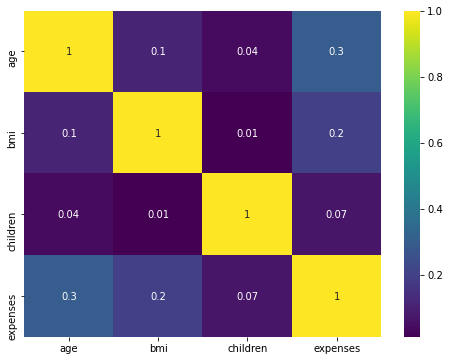

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

In [29]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


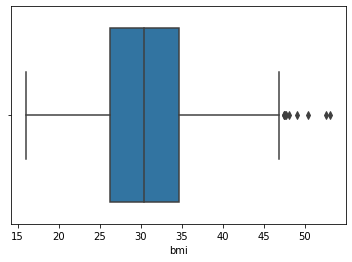

In [30]:
sns.boxplot(df['bmi'])

In [31]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
Q1, Q3

(26.3, 34.7)

In [32]:
IQR = Q3 - Q1
IQR

8.400000000000002

In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(13.699999999999998, 47.300000000000004)

In [34]:
df[df['bmi'] > upper_limit]


,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [35]:
df_new = df.drop(df.index[[116,401,286,543,847,860,1047,1088,1317]])


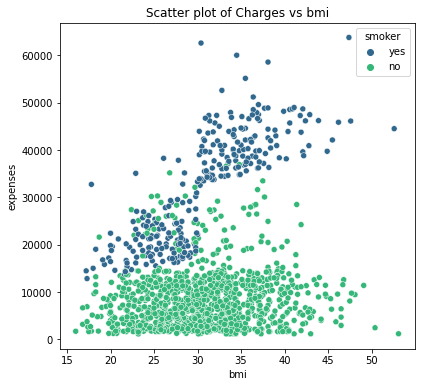

In [36]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [37]:
df["bmi"].value_counts()  

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
40.7     1
19.2     1
38.7     1
19.6     1
19.3     1
Name: bmi, Length: 275, dtype: int64

In [38]:
df['weight_condition'] = np.nan
data = [df]

for col in data:
    col.loc[col.bmi < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col.bmi >= 18.5) & (col.bmi < 24.986), "weight_condition"] = "Normal"
    col.loc[(col.bmi >= 25) & (col.bmi < 29.926), "weight_condition"] = "Overweight"
    col.loc[col.bmi >= 30, "weight_condition"] = "Obese"

In [39]:
print(data)

[      age     sex   bmi  children smoker     region  expenses weight_condition
0      19  female  27.9         0    yes  southwest  16884.92       Overweight
1      18    male  33.8         1     no  southeast   1725.55            Obese
2      28    male  33.0         3     no  southeast   4449.46            Obese
3      33    male  22.7         0     no  northwest  21984.47           Normal
4      32    male  28.9         0     no  northwest   3866.86       Overweight
...   ...     ...   ...       ...    ...        ...       ...              ...
1333   50    male  31.0         3     no  northwest  10600.55            Obese
1334   18  female  31.9         0     no  northeast   2205.98            Obese
1335   18  female  36.9         0     no  southeast   1629.83            Obese
1336   21  female  25.8         0     no  southwest   2007.95       Overweight
1337   61  female  29.1         0    yes  northwest  29141.36       Overweight

[1338 rows x 8 columns]]


In [40]:
df.drop("bmi", axis = 1, inplace = True)
display(df.head())

,age,sex,children,smoker,region,expenses,weight_condition
0,19,female,0,yes,southwest,16884.92,Overweight
1,18,male,1,no,southeast,1725.55,Obese
2,28,male,3,no,southeast,4449.46,Obese
3,33,male,0,no,northwest,21984.47,Normal
4,32,male,0,no,northwest,3866.86,Overweight


Text(0.5, 1.0, 'Scatter plot of Charges vs age')

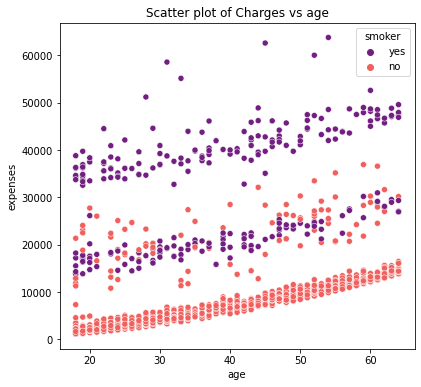

In [42]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')


In [43]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [44]:
df.drop("age", axis = 1, inplace = True)
df.head()

,sex,children,smoker,region,expenses,weight_condition,age_cat
0,female,0,yes,southwest,16884.92,Overweight,Young Adult
1,male,1,no,southeast,1725.55,Obese,Young Adult
2,male,3,no,southeast,4449.46,Obese,Young Adult
3,male,0,no,northwest,21984.47,Normal,Young Adult
4,male,0,no,northwest,3866.86,Overweight,Young Adult


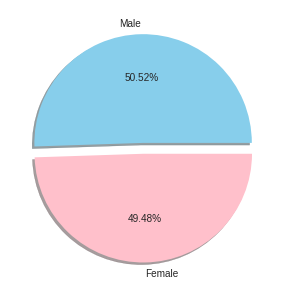

In [45]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


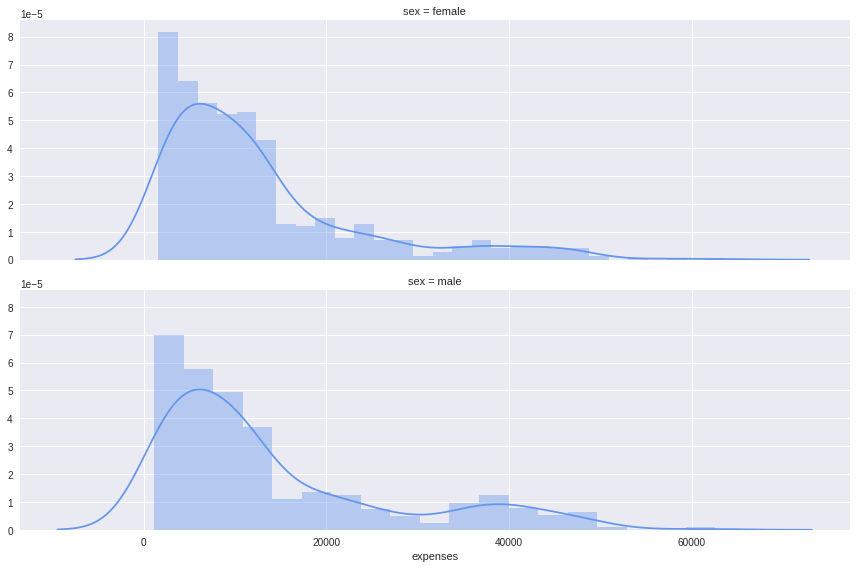

In [48]:
#Cheking the charges distributions for males and females
x1 = sns.FacetGrid(df, row='sex', height=4, aspect=3)
x1 = x1.map(sns.distplot, 'expenses', color='cornflowerblue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


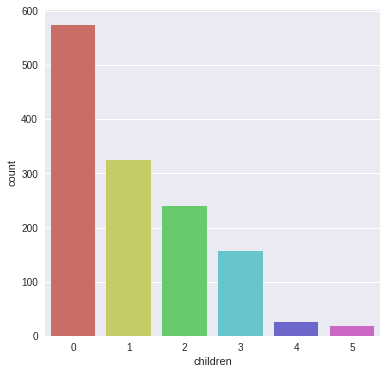

In [49]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(df["children"], palette="hls");

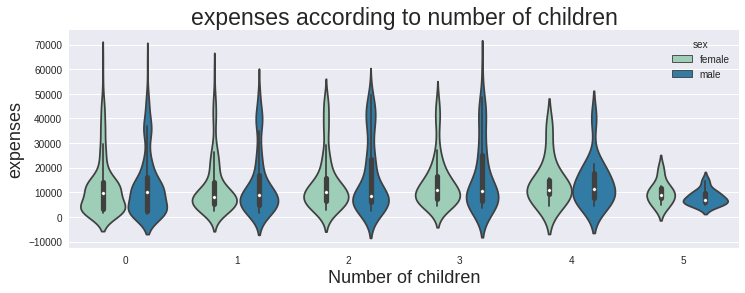

In [52]:
#Creating a violinplot for each category
plt.figure(figsize=(12,4))
sns.violinplot(x='children', y='expenses', data=df, hue='sex', palette='YlGnBu')
plt.title('expenses according to number of children', size='23')
plt.ylabel('expenses',size=18)
plt.xlabel('Number of children',size=18)
plt.show()

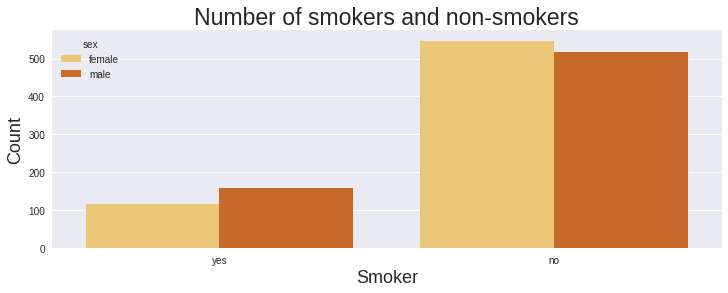

In [53]:

#Countplot to compare the number of smokers and non-smokers
plt.figure(figsize=(12,4))
sns.countplot(x='smoker', data=df, hue='sex', palette='YlOrBr') 
plt.title('Number of smokers and non-smokers', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Smoker',size=18)
plt.show()

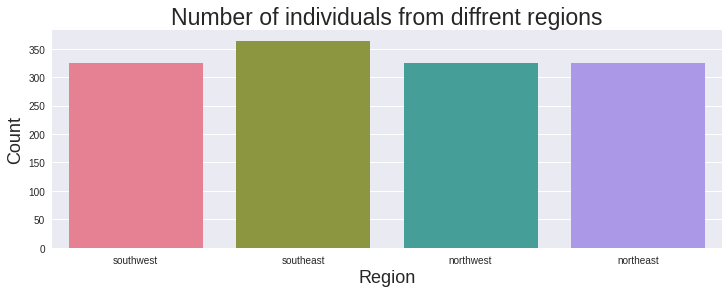

In [54]:
#Countplot to compare the number of individuals from diffrent regions
plt.figure(figsize=(12,4))
sns.countplot(x='region', data=df, palette='husl') 
plt.title('Number of individuals from diffrent regions', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Region',size=18)
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
les = {}
for col in ['sex','smoker','region', 'weight_condition', 'age_cat']:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

In [56]:
df.head()


,sex,children,smoker,region,expenses,weight_condition,age_cat
0,0,0,1,3,16884.92,2,2
1,1,1,0,2,1725.55,1,2
2,1,3,0,2,4449.46,1,2
3,1,0,0,1,21984.47,0,2
4,1,0,0,1,3866.86,2,2


In [59]:
x= df.drop('expenses',axis=1).values
y =df.expenses.values
x_tr,x_tst,y_tr,y_tst = train_test_split(x,y,test_size=.2,random_state=2)

In [60]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_tst = sc.transform(x_tst)

In [61]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=10)
dt  = DecisionTreeRegressor(max_depth = 3)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

Linear Regression : 71 %
K Nearest Neighbours : 77 %
Decision Tree : 84 %
Random Forest : 84 %
AdaBoost : 84 %
Gradient Boosting Regressor : 85 %
[06:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 85 %
CatBoostRegressor : 84 %


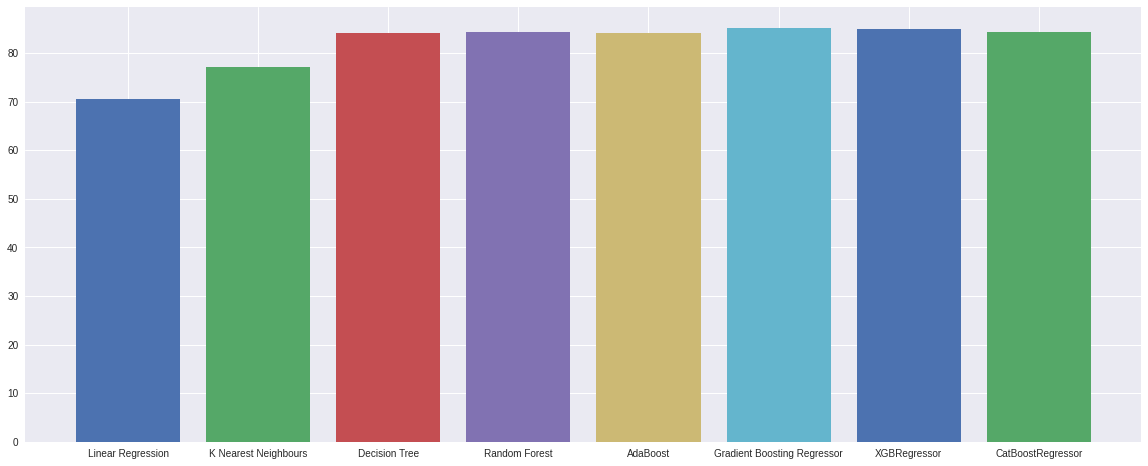

In [62]:
for regressor_name, regressor in regressors:

    regressor.fit(x_tr, y_tr)    
  
    y_pred = regressor.predict(x_tst)
    accuracy = round(r2_score(y_tst,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [63]:
y_predict = gbr.predict(x_tst)
gbr_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(gbr_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_1 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_1,5))

R square Score =  0.85186
Root Mean Squared Error =  4716.71564


In [67]:
y_predict = xgb.predict(x_tst)
xgb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(xgb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_2 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_2, 5))

R square Score =  0.84906
Root Mean Squared Error =  4761.08304


In [64]:
y_predict = cb.predict(x_tst)
cb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(cb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_3 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_3, 5))

R square Score =  0.84424
Root Mean Squared Error =  4836.55824


In [68]:
score = cross_val_score(xgb, x, y, cv=5)
print(score)

[06:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.85682555 0.79029212 0.85503153 0.83096951 0.86248212]


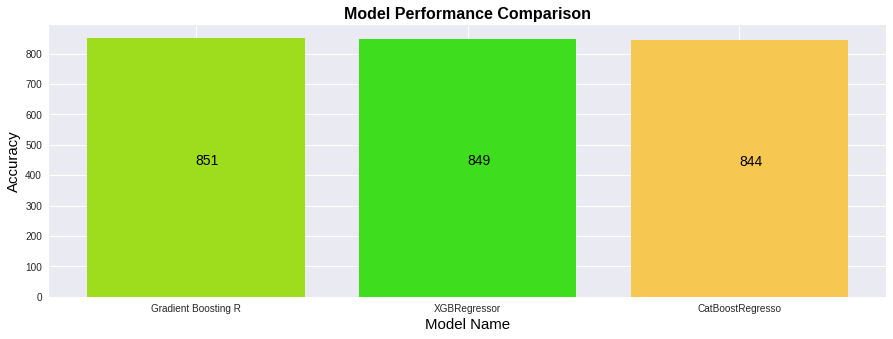

In [69]:
r2_scores = [gbr_r2_score*1000,xgb_r2_score*1000,cb_r2_score*1000]
model_names = ["Gradient Boosting R","XGBRegressor","CatBoostRegresso"]

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(model_names, r2_scores, alpha=1,color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=15, color='black')
plt.xlabel('Model Name',fontsize=15, color='black')
plt.title('Model Performance Comparison', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

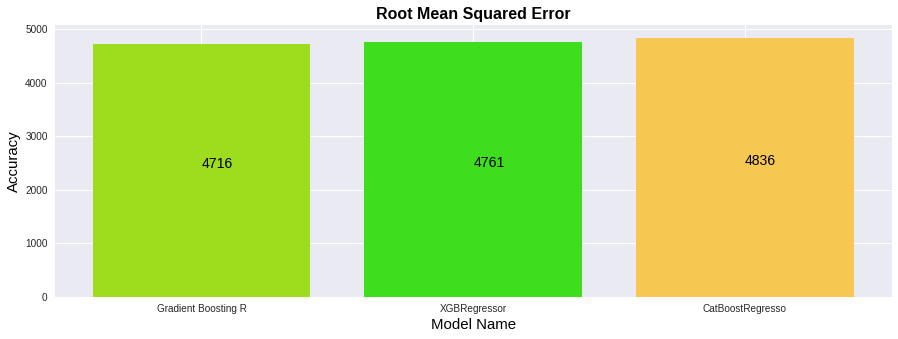

In [70]:
m = [rmse_1,rmse_2,rmse_3]
model_names = ["Gradient Boosting R","XGBRegressor","CatBoostRegresso"]

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(model_names, m, alpha=1,color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=15, color='black')
plt.xlabel('Model Name',fontsize=15, color='black')
plt.title('Root Mean Squared Error', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()